## Exercise in Photogrammetry I
## **Ex.3 : Histograms and Image Transformations**
### Points: 17

## A. Histogram Basics *(10 points)*
In this exercise, you will learn how to apply image transformations and how to compute histograms. Whenever you define a **function** write a **docstring** which gives details about the function itself as well as input and output.

For example: 
```
def my_function(arg1, arg2):
    """ Explain what your function does.

    Args:
        arg1: Explain the first argument.
        arg2: Explain the second argument.

    Returns:
        Give details about the return value.
    """
    ...
    return True
```

**Tasks:**
1. import all necessary modules to modify, load and visualize images *(0 points)*
2. Load ```images/cube.jpg``` as a **grayscale** image. Make sure that the pixels are within [0, 255] and the underlying datatype is *uint8*. Finally visualize the image and print out its minimum and maximum value as well as its data type. *(2 points)*
3. Define a **function** ```histogram(image)``` which takes as input an image [np.array] and returns its histogram [np.array]. The histogram should have 256 bins. Do not use built-in python functions which compute the histogram for you! *(3 points)*
4. Define a **function** ```cumulativeHistogram(hist)``` which takes as input a histogram [np.array] and returns the cumulative histogram [np.array]. The histogram should have 256 bins as well. *(3 points)*
5. **Compute** the **histogram** and **cumulative histogram** of the grayscale cube image by calling your previously defined functions. <br>Finally, **plot** the results and assign proper **labels** to both **axis**. *(2 points)*
<br>**Hint:** use ```plt.bar(...)``` for the histogram and ```plt.plot(...)``` for the cumulative histogram.

In [1]:
# 1. Import modules
import numpy as np 
from skimage.color import rgb2gray
import imageio
import matplotlib.pyplot as plt

%matplotlib inline

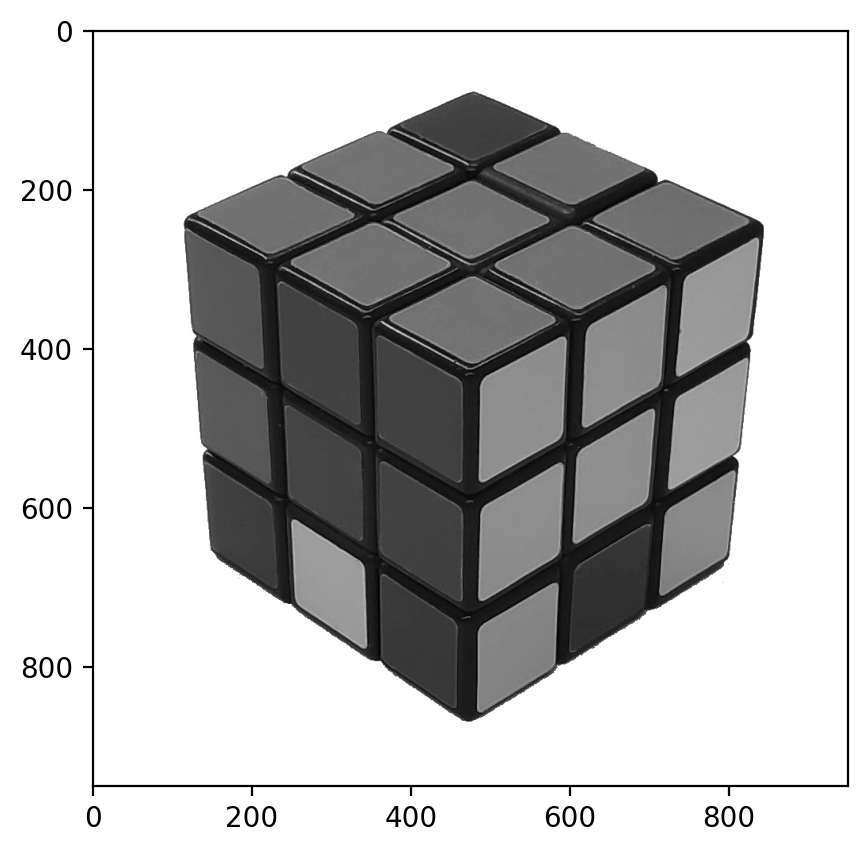

In [2]:
# 2. Load and visualize image
cube = imageio.imread('images/cube.jpg')
cube_gray_uint8 = np.uint8(rgb2gray(cube) * 255)

plt.figure(figsize=(5, 5), dpi=200)
plt.imshow(cube_gray_uint8, cmap='gray')

In [3]:
# Print out the minimum and maximum value of the displayed image as well as its data type
print(np.amin(cube_gray_uint8))
print(np.amax(cube_gray_uint8))
print(cube_gray_uint8.dtype)

0
255
uint8


In [4]:
# 3. Define your function called histogram(image) here:
# Not use the build-in function
def histogram(image):
    """
    image: gray scale image 
    """
    bins = np.zeros(256, dtype=np.int)
    for x in image: 
        for y in x: 
            bins[y] += 1
    return bins

In [5]:
# 4. Define your function called cumulativeHistogram(hist) here:
def cumulativeHistogram(hist):
    """
    Compute cumulative histogram given the his
    """
    H = np.zeros_like(hist)
    for i in range(len(hist)):
        H[i] = np.sum(hist[:i + 1])
    return H

In [6]:
# 5. Compute the histogram and cumulative Histogram
h = histogram(cube_gray_uint8)
H = cumulativeHistogram(h)
N = np.sum(h)

<BarContainer object of 256 artists>

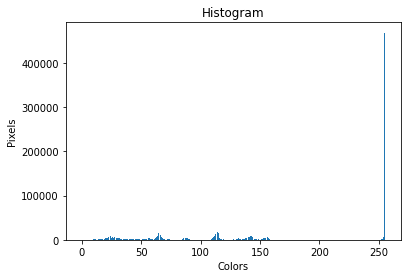

In [7]:
# Display them
# For histogram, use plt.bar()
x = np.arange(0, 256)
plt.title('Histogram')
plt.xlabel('Colors')
plt.ylabel('Pixels')
plt.bar(x, h)

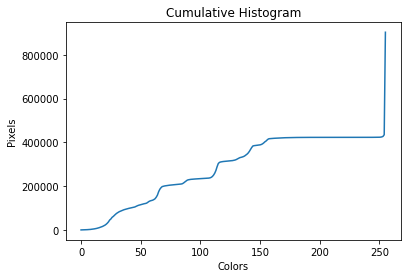

In [8]:
# For Cumulative histogram, use plt.plot()
plt.title('Cumulative Histogram')
plt.xlabel('Colors')
plt.ylabel('Pixels')
plt.plot(x, H)

## B. Histogram Equalization *(7 points)*
You have learned the concept for **histogram equalization** in the lecture. It transforms the image such that all intensities are used equally often. 

**Tasks:**
1. Define a **function** ```imageEqualization(image)``` which takes an image as input and returns the transformed image after applying the histogram equalization. *(3 points)*
2. **Compute** the **equalized** grayscale **cube image** and **visualize** it next to the original image. Set the title of each image properly. **Explain** your **observations** in the markdown cell below. *(2 points)*
3. **Compute** the **histogram** and **cumulative histogram** of the equalized image. **Plot** both histograms. In the markdown cell below **describe** the **differences** with respect to the original histograms. *(2 points)*

#### 1. Define a function ```imageEqualization(image)``` 

In [23]:
# 1. Define your function called imageEqualization(image) here:
def imageEqualization(image):
    """
    image: currently grayscale image
    monotonous function f such as b = f(a): a 1-D array where index is value at a, and value at that index is new value at b
    """
    h = histogram(image)
    H = cumulativeHistogram(h)
    N = np.sum(h)
    
    a = np.arange(0, 256)
    f = np.rint(255 * (H[a] - H[0]) / (N - H[0]))
    
    r, c = image.shape
    new_im = np.zeros_like(image)
    for i in range(r):
        for j in range(c):
            new_im[i, j] = f[image[i, j]]

    return new_im, f

#### 2.a. Compute the equalized grayscale cube image and visualize it next to the original image. 

In [24]:
# 2. Compute equalized image
equalized_cube_gray_uint8, f = imageEqualization(cube_gray_uint8)

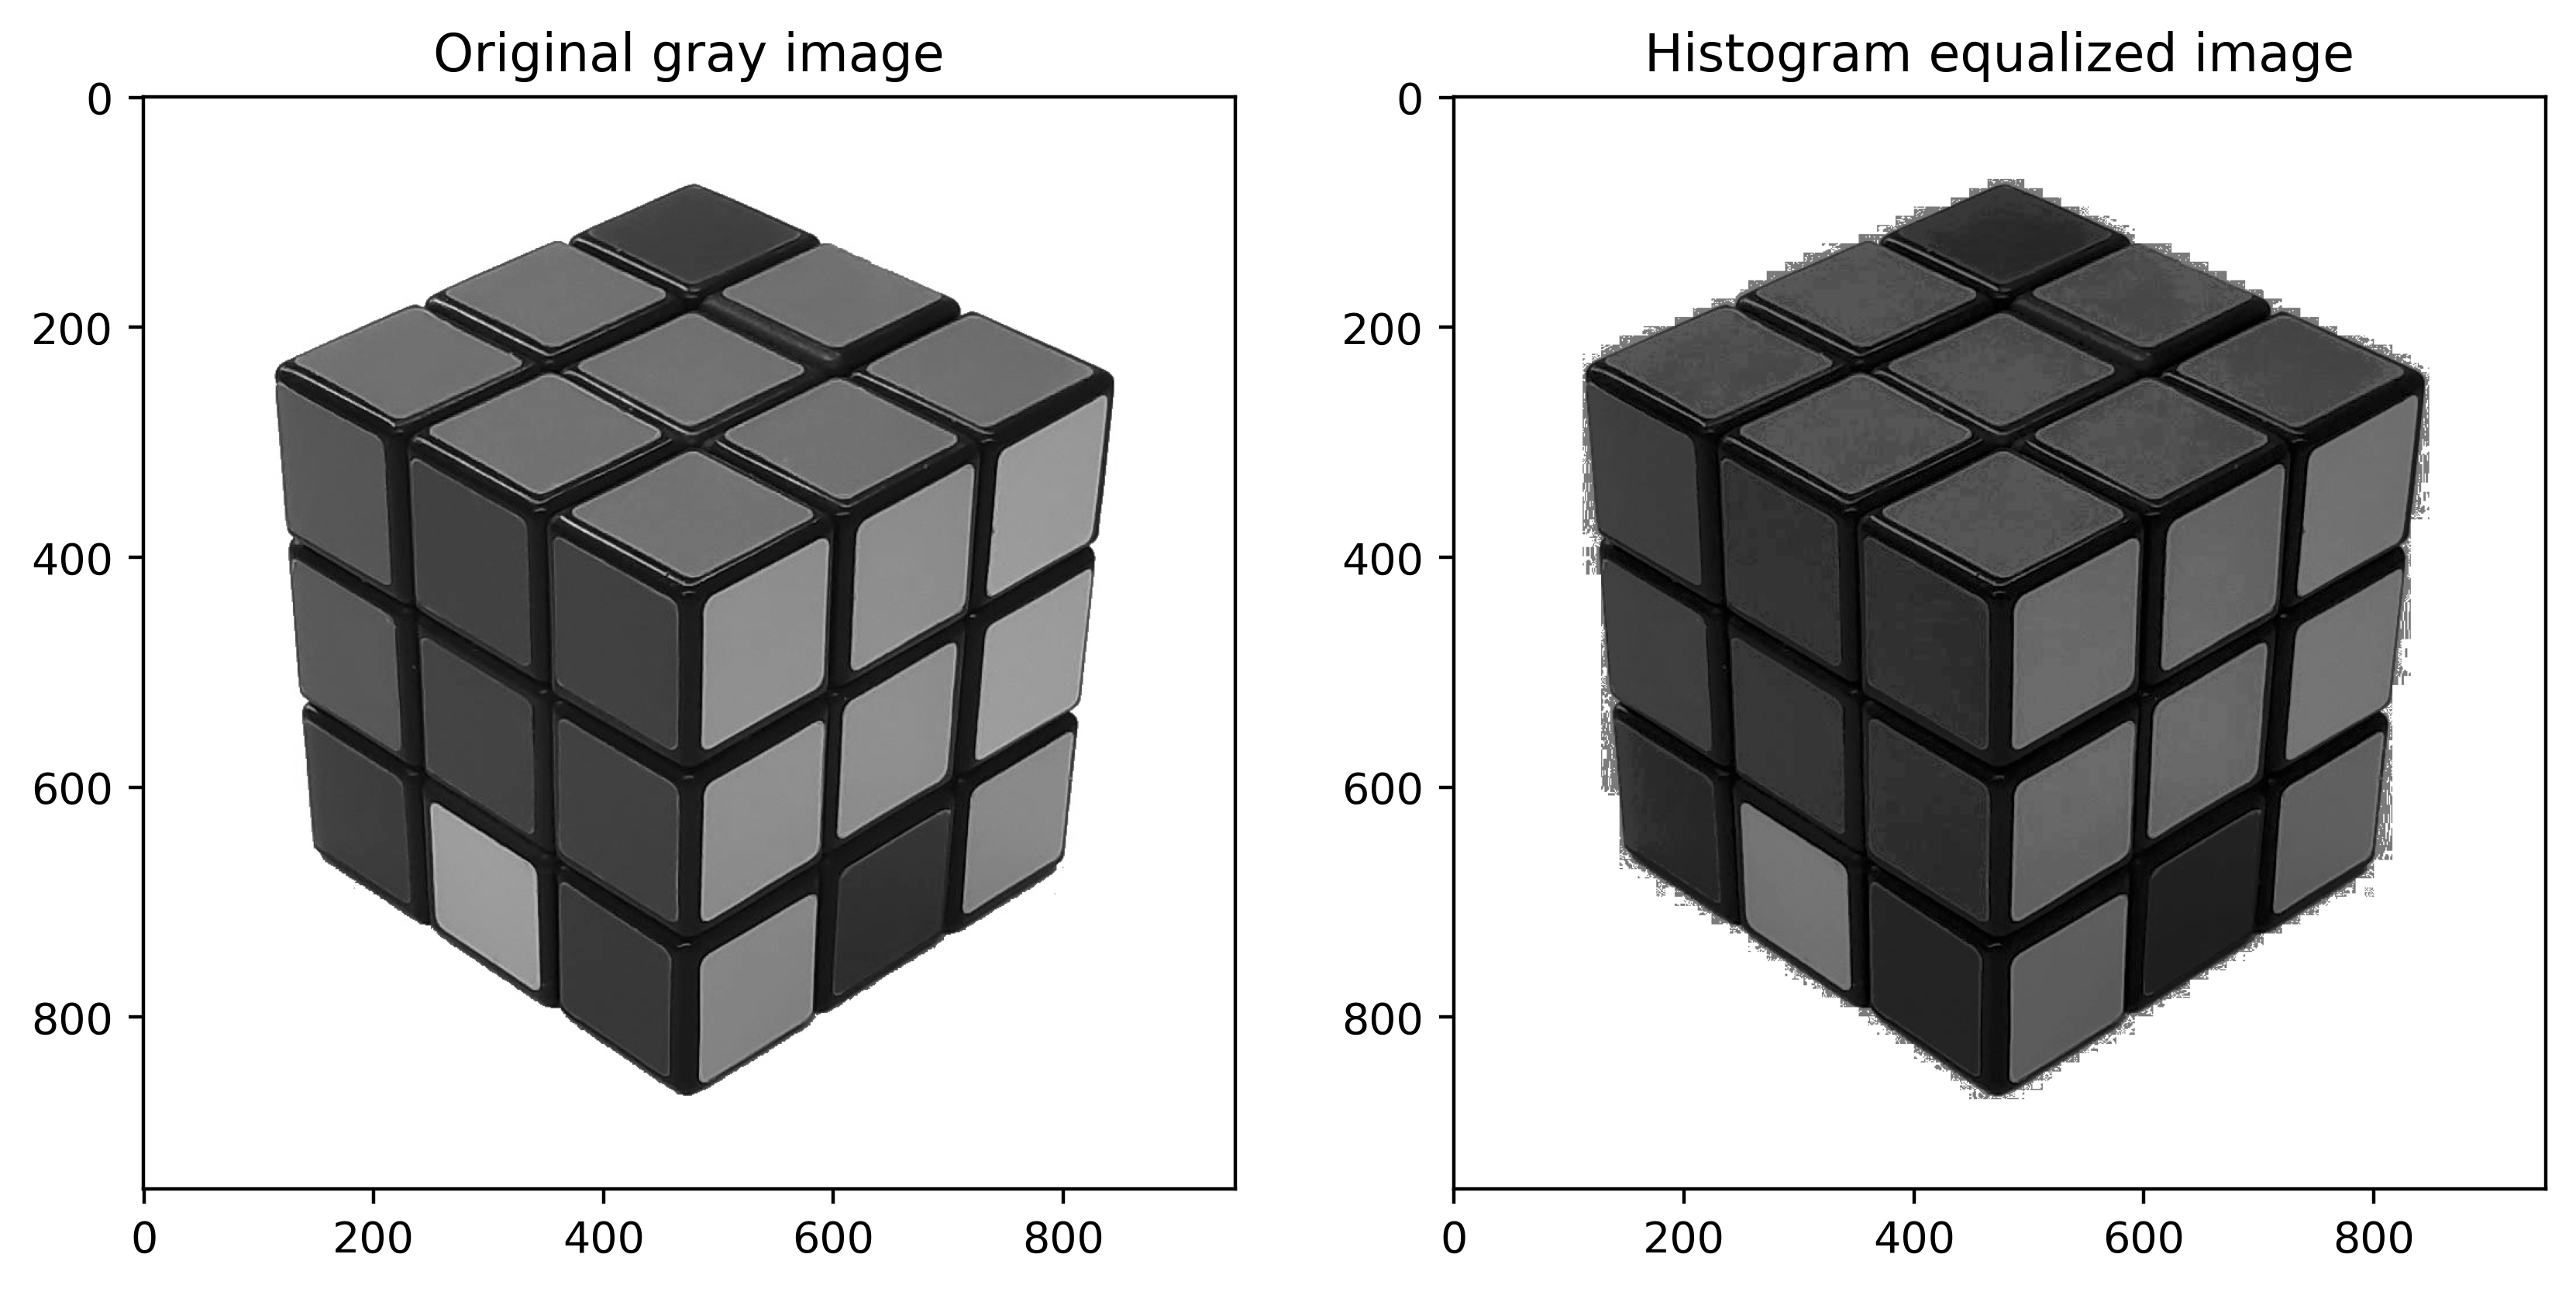

In [25]:
# 3. Visualized both of them
plt.figure(figsize=(10, 10), dpi=400)
plt.subplot(1,2,1)
plt.title('Original gray image')
plt.imshow(cube_gray_uint8, cmap="gray")
plt.subplot(1,2,2)
plt.title('Histogram equalized image')
plt.imshow(equalized_cube_gray_uint8, cmap="gray")

#### 2.b Explain your observations here

* There is a little bit darker in the result image (because image pixel are uniformly distribution in the cube zone)
* Due to white pixel are dominated, then HE can not "blend" white with the dark pixel of the cube (we can see the noise in the boundary of the cube due to HE's blending attempt)

#### 3.a. Compute the histogram and cumulative histogram of the equalized image. Plot both histograms.

In [18]:
# 3. Compute the histogram and cumulative histogram of the equalized image
h_equalized = histogram(equalized_cube_gray_uint8)
H_equalized = cumulativeHistogram(h_equalized)

<BarContainer object of 256 artists>

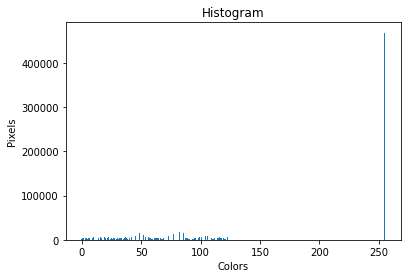

In [19]:
# Plot 
plt.title('Histogram')
plt.xlabel('Colors')
plt.ylabel('Pixels')
plt.bar(x, h_equalized)

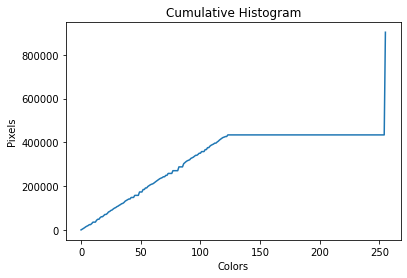

In [20]:
plt.title('Cumulative Histogram')
plt.xlabel('Colors')
plt.ylabel('Pixels')
plt.plot(x, H_equalized)

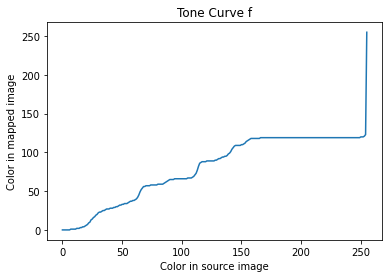

In [26]:
# Visualize the MonoTone Curve f
plt.title('Tone Curve f')
plt.xlabel('Color in source image')
plt.ylabel('Color in mapped image')
plt.plot(x, f)

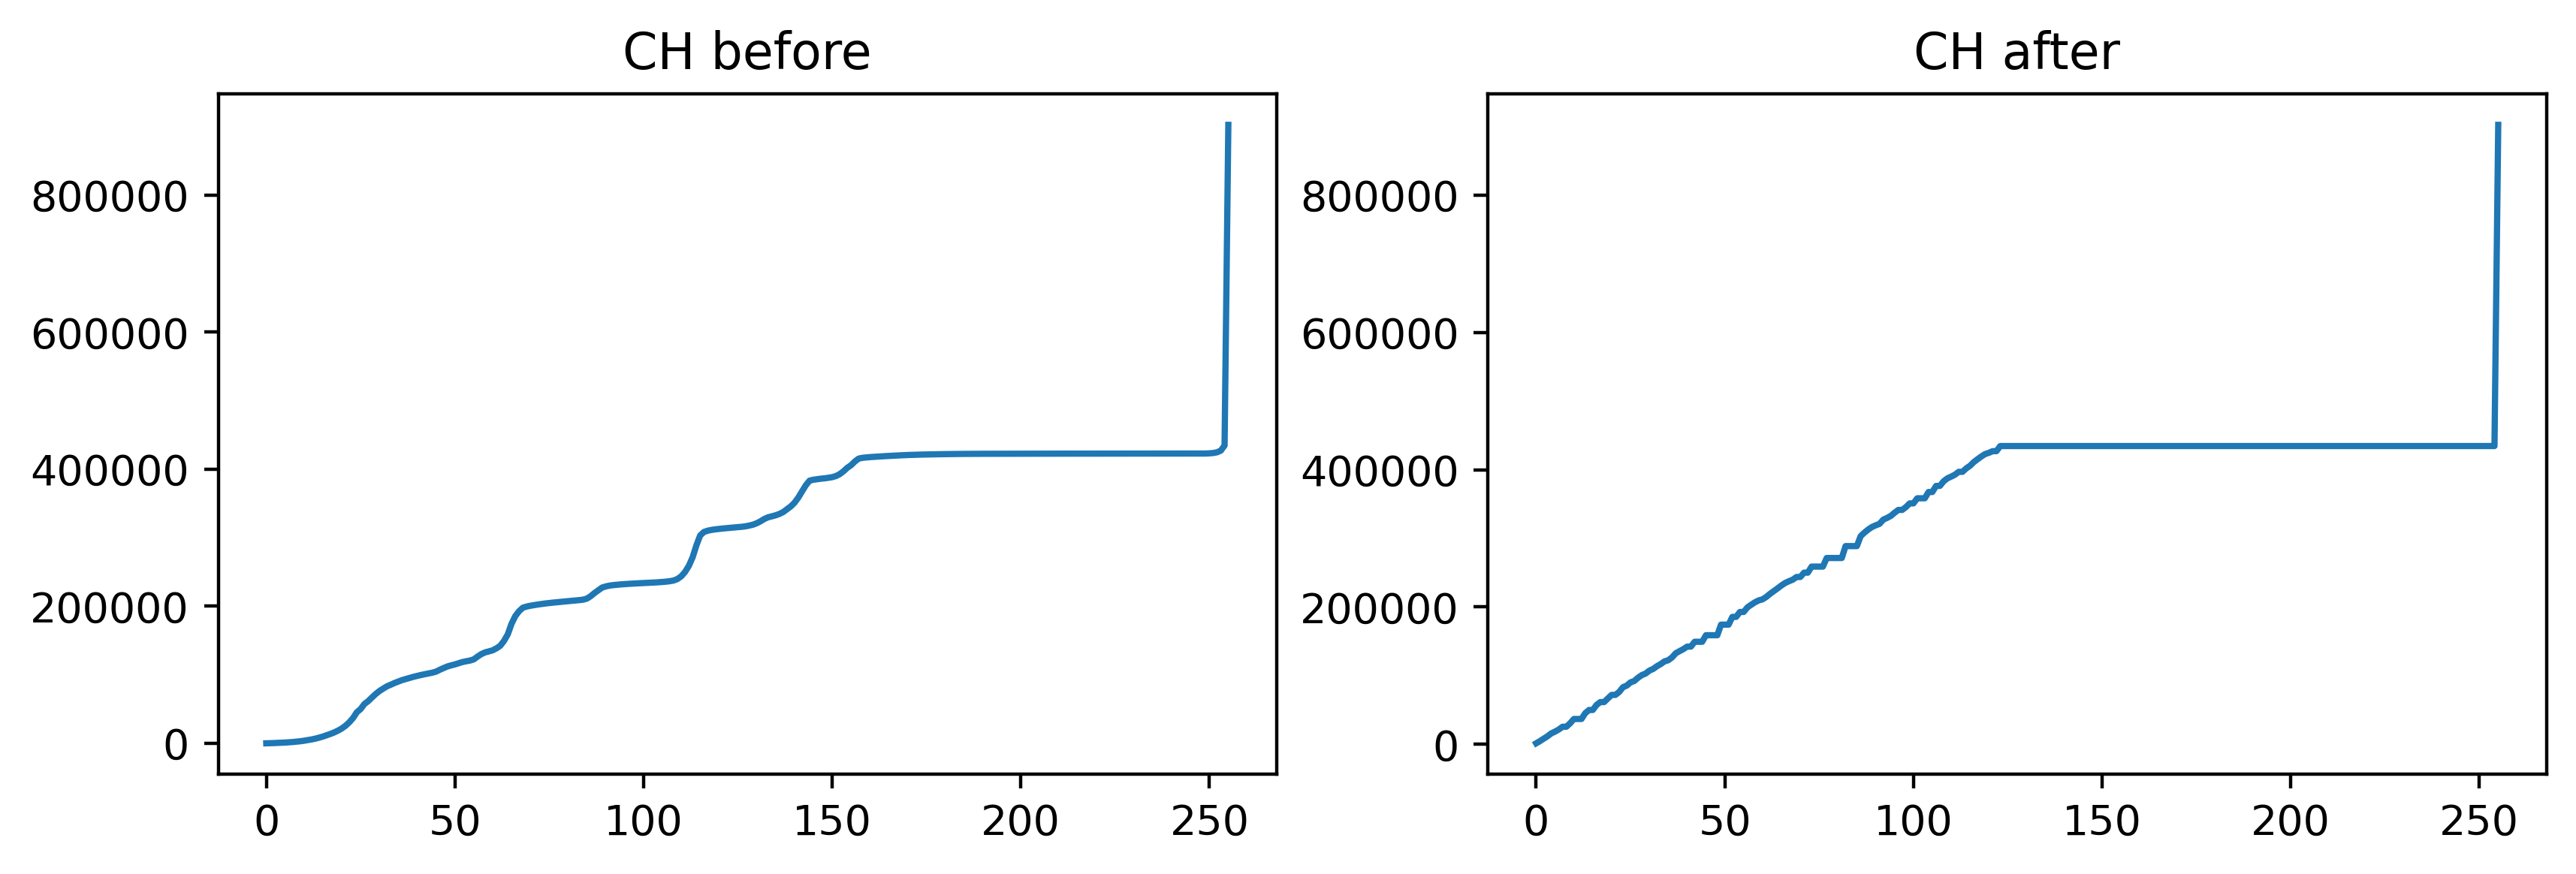

In [29]:
# Visualize both cumulative histogram before and after apply HE
plt.figure(figsize=(10, 3), dpi=400)
plt.subplot(1,2,1)
plt.title('CH before')
plt.plot(x, H)
plt.subplot(1,2,2)
plt.title('CH after')
plt.plot(x, H_equalized)

#### 3.b. Describe the differences with respect to the original histograms. 

* Base on Cumulative Histogram, we can se HE ajust the original image so that all pixel value (in range 0 to arround 125) are equally used, because of the linear shape (mean that the histogram of pixel in range 0-125 are in uniform distribution)

* But from 125 - 254, there no pixel intensity was used (there also have a huge zero range in the histogram of original image), and the fact that pixel with highest value 255 was dominated in both original image and image after applied HE.

### My experiment with 3 channel image and see the result

In [21]:
he_r = imageEqualization(cube[:, :, 0])
he_g = imageEqualization(cube[:, :, 1])
he_b = imageEqualization(cube[:, :, 2])

he_cube = np.stack((he_r, he_g, he_b), axis=-1)

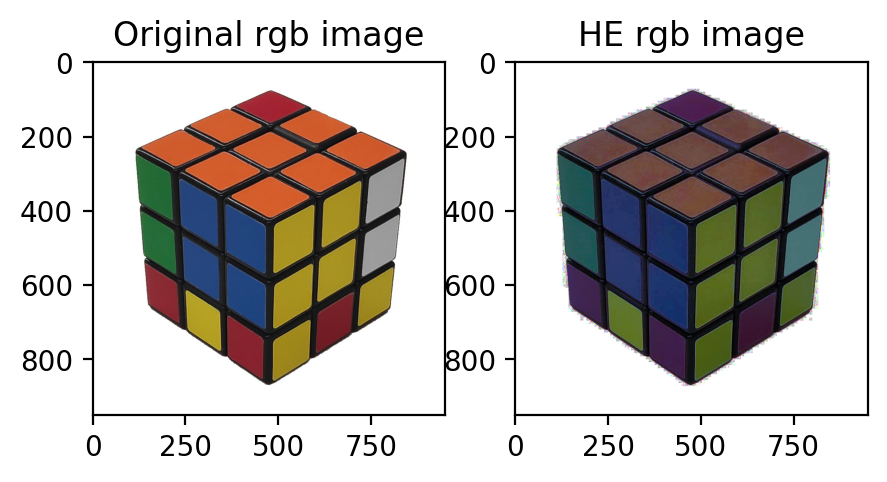

In [53]:
plt.figure(figsize=(5, 5), dpi=200)
plt.subplot(1,2,1)
plt.title('Original rgb image')
plt.imshow(cube)
plt.subplot(1,2,2)
plt.title('HE rgb image')
plt.imshow(he_cube)

Hummm, I think that is not the correct way - **this will distort the color !!!**. After search, I decided to follow these step from here: https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image

"A more general approach would be transforming RGB values into another space that contains a luminescence/intensity value (Luv, Lab, HSV, HSL), apply histeq only in intensity plane and perform the inverse transform."

In [39]:
# Helper function, see: https://gist.github.com/Quasimondo/c3590226c924a06b276d606f4f189639

def RGB2YUV(rgb):
    m = np.array([
        [0.29900, -0.16874, 0.50000],
        [0.58700, -0.33126, -0.41869],
        [0.11400, 0.50000, -0.08131]
    ])
    yuv = np.dot(rgb, m)
    yuv[:, :, 1:] += 128.
    return np.uint8(yuv)


def YUV2RGB(yuv):
    m = np.array([
        [1.0, 1.0, 1.0],
        [-0.000007154783816076815, -0.3441331386566162, 1.7720025777816772],
        [1.4019975662231445, -0.7141380310058594, 0.00001542569043522235]
    ])
    rgb = np.dot(yuv, m)
    rgb[:, :, 0] -= 179.45477266423404
    rgb[:, :, 1] += 135.45870971679688
    rgb[:, :, 2] -= 226.8183044444304
    return np.uint8(rgb)

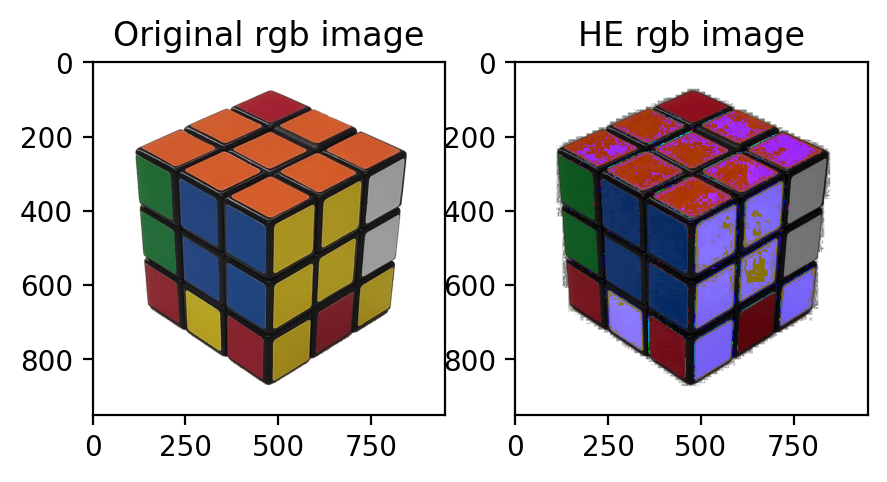

In [52]:
# Convert to yuv image 
cube_yuv = RGB2YUV(cube)

# # Equalize the histogram of the Y channel
cube_yuv[:, :, 0], _ = imageEqualization(cube_yuv[:, :, 0])

# Convert the YUV image back to RGB format
cube_rgb_he = YUV2RGB(cube_yuv)

plt.figure(figsize=(5, 5), dpi=200)
plt.subplot(1,2,1)
plt.title('Original rgb image')
plt.imshow(cube)
plt.subplot(1,2,2)
plt.title('HE rgb image')
plt.imshow(cube_rgb_he)

In [43]:
# Experiment with YCbCr
# See: https://stackoverflow.com/questions/34913005/color-space-mapping-ycbcr-to-rgb

def RGB2YCBCR(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def YCBCR2RGB(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

In [46]:
# Convert from RGB color-space to YCrCb
cube_ycrcb = RGB2YCBCR(cube)

# Equalize the histogram of the Y channel
cube_ycrcb[:, :, 0], _ = imageEqualization(cube_ycrcb[:, :, 0])

# Convert back to RGB color-space from YCrCb
cube_rgb_he_2 = YCBCR2RGB(cube_ycrcb)

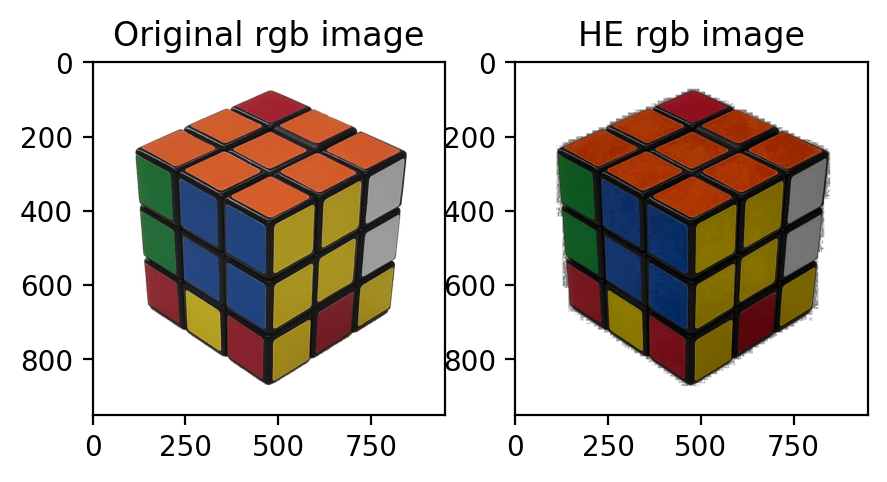

In [51]:
plt.figure(figsize=(5, 5), dpi=200)
plt.subplot(1,2,1)
plt.title('Original rgb image')
plt.imshow(cube)
plt.subplot(1,2,2)
plt.title('HE rgb image')
plt.imshow(cube_rgb_he_2)

OK!!! There we go :> 

## C. Noise Variance Equalization